In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Đọc dữ liệu từ file Excel
df = pd.read_excel('tb_tracking.xlsx', header=None)

# a) Thêm tiêu đề cho các cột
df.columns = ['id', 'device_id', 'co_level', 'humidity', 'temperature', 'time']

print("Dữ liệu sau khi thêm tiêu đề:")
print(df.head(10))
print(f"\nSố dòng ban đầu: {len(df)}")


Dữ liệu sau khi thêm tiêu đề:
     id  device_id  co_level  humidity  temperature                time
0   1.0        1.0       2.0       3.0          4.0 2016-12-20 12:52:29
1   2.0        1.0       2.0       3.0          4.0 2016-12-20 12:52:31
2   3.0      100.0       2.0       3.0          4.0 2016-12-20 12:52:35
3   4.0      100.0       2.0       3.0        400.0 2016-12-20 12:52:37
4   5.0        1.0       2.0       3.0          4.0 2016-12-20 13:02:01
5   6.0      100.0       2.0       3.0        400.0 2016-12-20 13:02:24
6   7.0       -1.0       0.0      83.0         28.0 2016-12-21 12:03:39
7   8.0       -1.0       0.0      83.0         28.0 2016-12-21 12:05:02
8   9.0       -1.0       0.0      83.0         28.0 2016-12-21 12:05:49
9  10.0        1.0       2.0       3.0          4.0 2016-12-21 12:08:58

Số dòng ban đầu: 33340


In [2]:
# b) Lọc dữ liệu từ ngày 03/01/2018 trở đi
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y %H:%M')

cutoff_date = pd.to_datetime('03/01/2018', format='%d/%m/%Y')
df_filtered = df[df['time'] >= cutoff_date].copy()

print(f"\nSố dòng sau khi lọc (từ 03/01/2018): {len(df_filtered)}")
print("\nDữ liệu sau khi lọc:")
print(df_filtered.head(10))



Số dòng sau khi lọc (từ 03/01/2018): 1918

Dữ liệu sau khi lọc:
            id  device_id  co_level  humidity  temperature                time
31419  31420.0        1.0       2.0       3.0          4.0 2018-01-03 13:11:07
31420  31421.0        1.0       2.0       3.0          4.0 2018-01-03 13:15:10
31421  31422.0    99005.0      58.0      26.0          0.0 2018-01-03 13:17:30
31422  31423.0    99005.0      58.0      26.0          0.0 2018-01-03 13:19:21
31423  31424.0    99005.0      58.0      26.0          0.0 2018-01-03 13:24:17
31424  31425.0    99005.0      60.0      26.0          0.0 2018-01-03 13:29:13
31425  31426.0    99005.0      64.0      26.0          0.0 2018-01-03 13:34:10
31426  31427.0    99005.0      60.0      27.0          0.0 2018-01-03 14:05:34
31427  31428.0    99005.0      60.0      27.0          0.0 2018-01-03 14:10:43
31428  31429.0    99005.0      60.0      27.0          0.0 2018-01-03 14:15:39


In [3]:
# c) Tạo cột minutes - thời điểm đo đạc trong ngày tính theo phút
df_filtered['minutes'] = df_filtered['time'].dt.hour * 60 + df_filtered['time'].dt.minute

print("\nDữ liệu sau khi thêm cột minutes:")
print(df_filtered[['time', 'minutes', 'co_level', 'humidity', 'temperature']].head(10))



Dữ liệu sau khi thêm cột minutes:
                     time  minutes  co_level  humidity  temperature
31419 2018-01-03 13:11:07      791       2.0       3.0          4.0
31420 2018-01-03 13:15:10      795       2.0       3.0          4.0
31421 2018-01-03 13:17:30      797      58.0      26.0          0.0
31422 2018-01-03 13:19:21      799      58.0      26.0          0.0
31423 2018-01-03 13:24:17      804      58.0      26.0          0.0
31424 2018-01-03 13:29:13      809      60.0      26.0          0.0
31425 2018-01-03 13:34:10      814      64.0      26.0          0.0
31426 2018-01-03 14:05:34      845      60.0      27.0          0.0
31427 2018-01-03 14:10:43      850      60.0      27.0          0.0
31428 2018-01-03 14:15:39      855      60.0      27.0          0.0



XỬ LÝ OUTLIERS

co_level:
  Q1=27.00, Q3=28.00, IQR=1.00
  Ngưỡng: [25.50, 29.50]
  Số outliers loại bỏ: 170 (8.86%)

humidity:
  Q1=64.00, Q3=79.00, IQR=15.00
  Ngưỡng: [41.50, 101.50]
  Số outliers loại bỏ: 1 (0.06%)

temperature:
  Q1=2168320.00, Q3=2585215.00, IQR=416895.00
  Ngưỡng: [1542977.50, 3210557.50]
  Số outliers loại bỏ: 57 (3.26%)

Tổng số dòng giữ lại: 1690/1918 (88.11%)

THỐNG KÊ DỮ LIỆU SAU KHI XỬ LÝ OUTLIERS
          co_level     humidity   temperature      minutes
count  1690.000000  1690.000000  1.690000e+03  1690.000000
mean     27.671598    71.023669  2.366916e+06   700.831953
std       0.747103     9.940589  3.102134e+05   413.948762
min      26.000000    44.000000  1.837950e+06     1.000000
25%      27.000000    64.000000  2.164330e+06   348.000000
50%      28.000000    71.000000  2.337470e+06   676.000000
75%      28.000000    80.000000  2.561088e+06  1037.750000
max      29.000000    86.000000  3.208980e+06  1439.000000


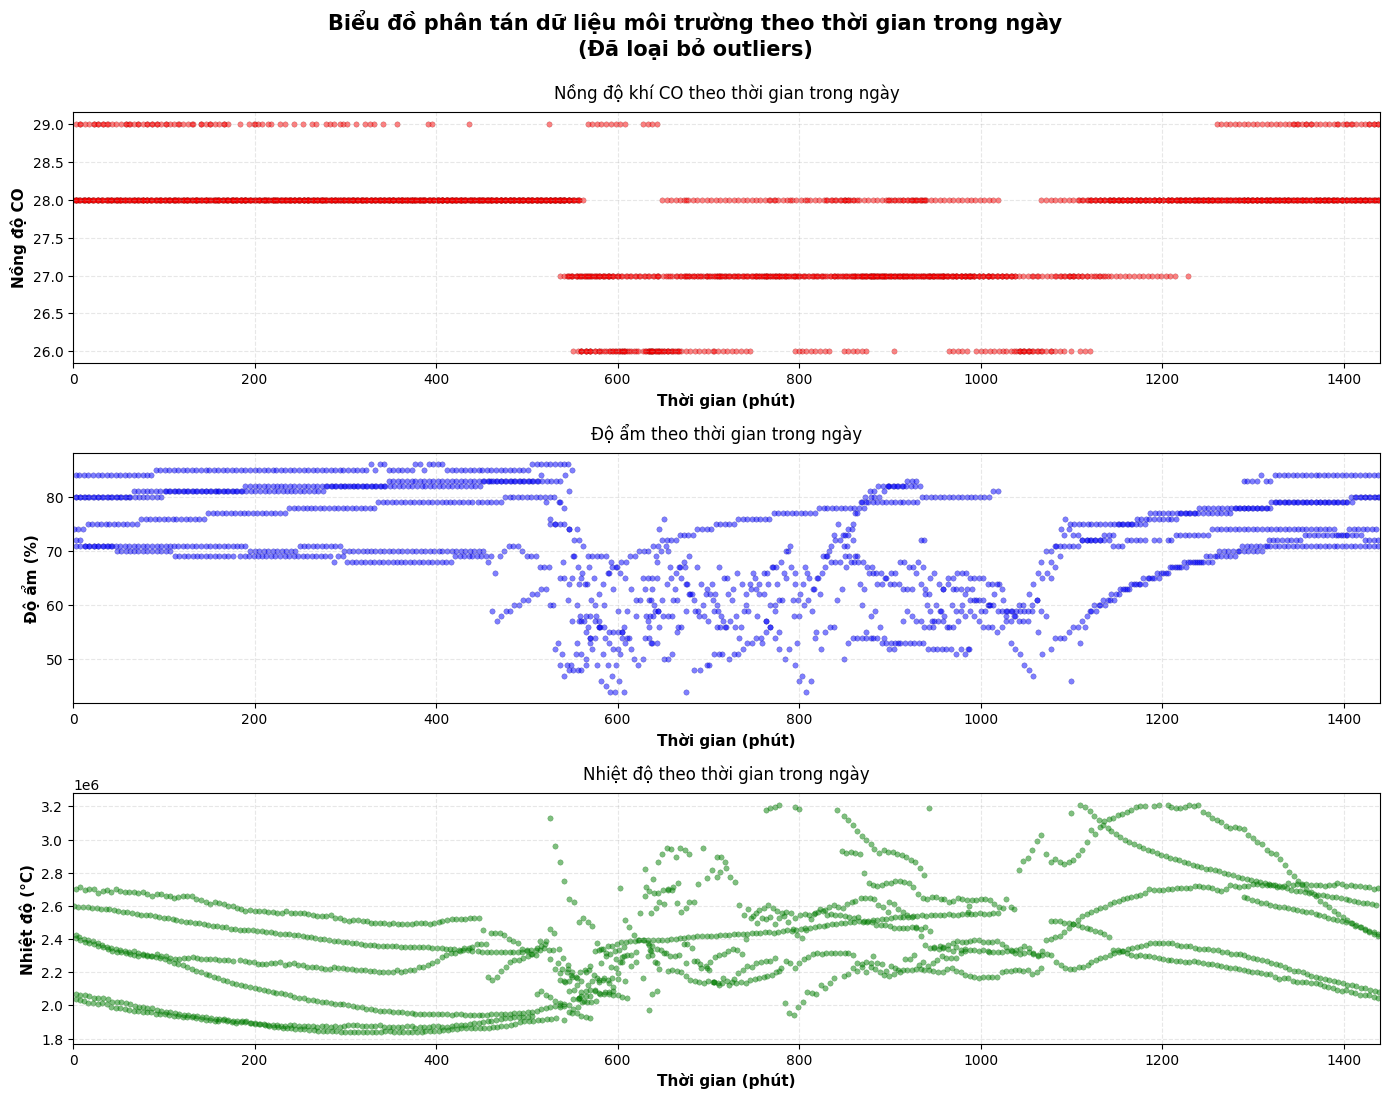

In [14]:
# Câu d
# Xử lý outliers bằng phương pháp IQR (Interquartile Range)
def remove_outliers_iqr(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\n{column}:")
    print(f"  Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
    print(f"  Ngưỡng: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Số outliers loại bỏ: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Loại bỏ outliers cho từng cột
print("\n" + "="*60)
print("XỬ LÝ OUTLIERS")
print("="*60)

df_clean = df_filtered.copy()
original_count = len(df_clean)

for col in ['co_level', 'humidity', 'temperature']:
    df_clean = remove_outliers_iqr(df_clean, col, k=1.5)

print(f"\nTổng số dòng giữ lại: {len(df_clean)}/{original_count} ({len(df_clean)/original_count*100:.2f}%)")

print("\n" + "="*60)
print("THỐNG KÊ DỮ LIỆU SAU KHI XỬ LÝ OUTLIERS")
print("="*60)
print(df_clean[['co_level', 'humidity', 'temperature', 'minutes']].describe())

# d) Vẽ đồ thị phân tán với dữ liệu đã làm sạch
fig, axes = plt.subplots(3, 1, figsize=(14, 11))
fig.suptitle('Biểu đồ phân tán dữ liệu môi trường theo thời gian trong ngày\n(Đã loại bỏ outliers)',
             fontsize=15, fontweight='bold', y=0.995)

# Đồ thị nồng độ khí CO
axes[0].scatter(df_clean['minutes'], df_clean['co_level'],
                alpha=0.5, c='red', s=15, edgecolors='darkred', linewidth=0.3)
axes[0].set_xlabel('Thời gian (phút)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Nồng độ CO', fontsize=11, fontweight='bold')
axes[0].set_title('Nồng độ khí CO theo thời gian trong ngày', fontsize=12, pad=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 1440)

# Đồ thị độ ẩm
axes[1].scatter(df_clean['minutes'], df_clean['humidity'],
                alpha=0.5, c='blue', s=15, edgecolors='darkblue', linewidth=0.3)
axes[1].set_xlabel('Thời gian (phút)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Độ ẩm (%)', fontsize=11, fontweight='bold')
axes[1].set_title('Độ ẩm theo thời gian trong ngày', fontsize=12, pad=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 1440)

# Đồ thị nhiệt độ
axes[2].scatter(df_clean['minutes'], df_clean['temperature'],
                alpha=0.5, c='green', s=15, edgecolors='darkgreen', linewidth=0.3)
axes[2].set_xlabel('Thời gian (phút)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Nhiệt độ (°C)', fontsize=11, fontweight='bold')
axes[2].set_title('Nhiệt độ theo thời gian trong ngày', fontsize=12, pad=10)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].set_xlim(0, 1440)

plt.tight_layout()
plt.show()


